## 02. Neural Netwrok classifcation with PyTorch

Classification is a problem of predicitng whether something is one thing or another

Link: https://www.learnpytorch.io/02_pytorch_classification/
Github resources: https://github.com/mrdbourke/pytorch-deep-learning

## 1. Make classification data and get ready

In [85]:
import sklearn
from sklearn.datasets import make_circles

#make 100 samples
n_samp=1000

#create circles

X,y=make_circles(n_samp,
                 noise=0.03,
                 random_state=42)
len(X),len(y)

(1000, 1000)

In [86]:
print(f"First f samples of X: {X[:5]}")
print(f"First f samples of y: {y[:5]}")

First f samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First f samples of y: [1 1 1 1 0]


In [87]:
#make a DataFrame of circles
import pandas as pd

circles=pd.DataFrame({"X1":X[:,0],
                      "X2":X[:,1],
                      "label":y})

circles.head(5)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


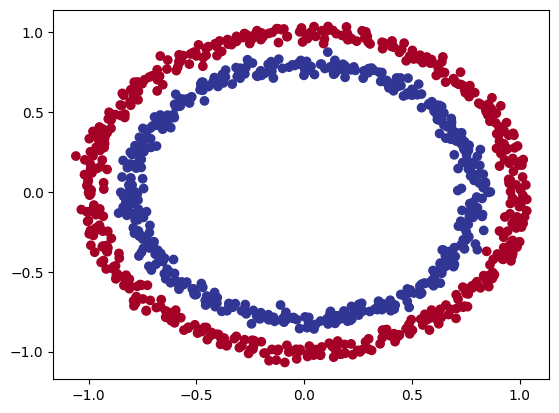

In [88]:
#Visualise
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)


data we're working with is often refered to as a toy dataset; samll enough to experiment on but sizable enough por practical applications
link: https://scikit-learn.org/stable/datasets/toy_dataset.html

### 1.1 Check input and output shapes

In [89]:
X.shape, y.shape

((1000, 2), (1000,))

In [90]:
## View forst example of features and labels
X_sample=X[0]
y_sample=y[0]

print(f"Values for one sample of X:{X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X:{X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X:[0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X:(2,) and the same for y: ()


### 1.2 Turn Data into tensors and create train and test splits

In [91]:
#Turn data into tensors
import torch
torch.__version__

'2.3.0+cu121'

In [92]:
print(f"initially {type(X)}")
print(f"initially {type(y)}")
#Turn into tensors

X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)
print(f"Converted {type(X)}")
print(f"Converted {type(y)}")

initially <class 'numpy.ndarray'>
initially <class 'numpy.ndarray'>
Converted <class 'torch.Tensor'>
Converted <class 'torch.Tensor'>


In [93]:
#Split into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,#20% of data is test
                                                  random_state=42)

len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify blue and red dots

To do so we want to:
1. Set up device agnostic code; run on a GPU is available
2. Construct a model (by subclassing `nn.Module`)
3. Define loss function and OptimizeR
4. Create traiing and test loop


In [94]:
#Import Pytorch and nn
import torch
from torch import nn

#agnostic code
device ="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Now we got the agnostic code, let's create a model that:
1. Subclasses `nn.Module` (almost all models in PyTorch sublass `nn.Module`)
2. Create 2 `nn.Linear` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of our model
4. Instatiate an instance of our model class and send it to the target `device `

In [95]:
#1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2 Create 2 nn.Linear layers capable of handling shapes of the data
    self.layer_1=nn.Linear(in_features=2,out_features=5) #takes in 2 features and upscales to 5 features
    self.layer_2=nn.Linear(in_features=5,out_features=1) # takes in 5 features from previous layer and outputs a signle layer (same shape as y)

    #self.two_linear_layer=model_0=nn.Sequential(
    #nn.Linear(in_features=2,out_features=5),
    #nn.Linear(in_features=5,out_features=1)
      #)

  #3. define forward method that outlines the forward pass
    def forward(self, x):
      return self.layer_2(self.layer_1(x)) #x->layer_1->layer_2->output

    #return two_linear_layer(x)

  #4. Instantiate an instance of our model class and send it to the target device

model_0=CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [96]:
next(model_0.parameters()), model_0.state_dict()

(Parameter containing:
 tensor([[ 0.5406,  0.5869],
         [-0.1657,  0.6496],
         [-0.1549,  0.1427],
         [-0.3443,  0.4153],
         [ 0.6233, -0.5188]], requires_grad=True),
 OrderedDict([('layer_1.weight',
               tensor([[ 0.5406,  0.5869],
                       [-0.1657,  0.6496],
                       [-0.1549,  0.1427],
                       [-0.3443,  0.4153],
                       [ 0.6233, -0.5188]])),
              ('layer_1.bias',
               tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])),
              ('layer_2.weight',
               tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])),
              ('layer_2.bias', tensor([-0.2060]))]))

In [97]:
# Let's replicate model above with nn.Sequential()
model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0, model_0.state_dict()

(Sequential(
   (0): Linear(in_features=2, out_features=5, bias=True)
   (1): Linear(in_features=5, out_features=1, bias=True)
 ),
 OrderedDict([('0.weight',
               tensor([[-0.0829, -0.2872],
                       [ 0.4691, -0.5582],
                       [-0.3260, -0.1997],
                       [-0.4252,  0.0667],
                       [-0.6984,  0.6386]])),
              ('0.bias',
               tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
              ('1.weight',
               tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
              ('1.bias', tensor([-0.1213]))]))

In [98]:
# Make predictions
with torch.inference_mode():
  untrained_preds=model_0(X_test.to(device))
print(f"Length of predictions:{len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples:{len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predicitions: \n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels: \n{y_test[:10]}")

Length of predictions:200, Shape: torch.Size([200, 1])
Length of test samples:200, Shape: torch.Size([200, 2])

First 10 predicitions: 
tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]])

First 10 labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

Which loss function and optimizer should be ussed for classification?

For regression you might want MAE or MSE (mean absolute error or mean squared error)

For classification you might want binary cross entropy or categorical corss entropy (cross entropy)

As a reminder, loss function measures how *wrong* predictions are.

For optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built-in options.

* For some common choices of loss and optimizers: https://learnpytorch.io/02_pytorch_classification/#21-setup-loss-function-and-optimizer
* For the loss function we'll use `torch.nn.BECWWithLogitsLoss()`
* For more on BCE check here: https://towardsdatascience.com/uderstanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a
* For what a Logit is in deep learning: https://stackoverflow.com/a/52111173/7900723
* For different optimizers see `torch.optim`

In [99]:
#Setup the loss function
#loss_fn=nn.BCELoss() #BCELoss = requires inputs to have gone through the sigmoid activation function prior to input into BCELoss
loss_fn=nn.BCEWithLogitsLoss() #BCEWithLogitsLoss()=sigmoid activation function built-in

optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)

In [100]:
# Calculate accuracy - out of 100 examples what percentage does the model get right?
def accuracy_fn(y_true, y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

## 3. Train model

To train model we need a training loop:

1. Forward pass
2. Calculate the loss
3. Optimize the zero grad
4. Loss backwards(backpropogation)
5. GRadient descent/pttimizer step

### 3.1 Going from raw logits->prediction probabilities->prediction labels

Out models outputs are going to be raw **logits**

We can convert **Logits into prediction probabilities by passing them to some kind of activation function (e.g sigmoids for binary classification and softmax for multiclass classification).

Then we can convert model's prediction to **prediction labels** by either rounding or taking the `argmax()`.

In [101]:
#View first 5 of forward pass on test data
model_0.eval()
with torch.inference_mode():
  y_logits=model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]])

In [102]:
# use sigmoid activation function on model logits to turn them into prediction probabilities

y_pred_probs=torch.sigmoid(y_logits)

y_pred_probs, torch.round(y_pred_probs)

(tensor([[0.4916],
         [0.4923],
         [0.5223],
         [0.4827],
         [0.5736]]),
 tensor([[0.],
         [0.],
         [1.],
         [0.],
         [1.]]))

For our prediction probability values we need to perform a range-style rounding on them:
* `y_pred_prob`>=0.5 `y=1` (class 1)
* `y_pred_probs`<0.5 `y=0` (class 0)


In [103]:
#Find predicted labels
y_preds=torch.round(y_pred_probs)

#In full (logits->pred probs->labels)
y_pred_labels=torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#check for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

#get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 1., 0., 1.])

### 3.2 Building a training and test loop

In [104]:
torch.manual_seed(42)

#set number of epochs
epochs=100

#put data to target device
X_train, y_train=X_train.to(device), y_train.to(device)
X_test, y_test=X_test.to(device), y_test.to(device)

#Build training loop
for epoch in range(epochs):

  #TRaining
  model_0.train()

  #1.Forward pass
  y_logits=model_0(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))# turn logits->pred probs->pred labels

  #2. Calculate the loss (dependent on loss function/different from linear regression model built)

  #loss=loss_fn(torch.sigmoid(y_logits, #nn.BCELOss expects prediction probabilities as input
             # y_train)) if using BCELoss
  loss=loss_fn(y_logits, ##nn.BCEWithMogitsLoss expects raw logits as input
               y_train)
  acc=accuracy_fn(y_true=y_train,
                  y_pred=y_pred)

  #3. Optimizer zer grad
  optimizer.zero_grad()

  #4.Loss backward
  loss.backward()

  #5. Optimizer step (gradient descent)
  optimizer.step()


 ##TESTING##
  model_0.eval()
  with torch.inference_mode():
  #1.forward pass
    test_logits=model_0(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

  #2. Calculate test loss/acc
    test_loss=loss_fn(test_logits,
                    y_test)
    test_acc=accuracy_fn(y_true=y_test,
                       y_pred=test_pred)

  #3. Print out what's happening
  if epoch%10==0:
    print(f"Epoch: {epoch} | Loss {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc:{test_acc:2f}%")




Epoch: 0 | Loss 0.69796, Acc: 51.88% | Test loss: 0.69440, Test acc:58.000000%
Epoch: 10 | Loss 0.69590, Acc: 51.25% | Test loss: 0.69305, Test acc:53.000000%
Epoch: 20 | Loss 0.69490, Acc: 51.62% | Test loss: 0.69254, Test acc:49.500000%
Epoch: 30 | Loss 0.69435, Acc: 51.12% | Test loss: 0.69236, Test acc:49.500000%
Epoch: 40 | Loss 0.69401, Acc: 50.88% | Test loss: 0.69232, Test acc:51.000000%
Epoch: 50 | Loss 0.69378, Acc: 50.25% | Test loss: 0.69234, Test acc:50.000000%
Epoch: 60 | Loss 0.69362, Acc: 50.00% | Test loss: 0.69239, Test acc:51.500000%
Epoch: 70 | Loss 0.69351, Acc: 50.25% | Test loss: 0.69246, Test acc:51.000000%
Epoch: 80 | Loss 0.69342, Acc: 49.88% | Test loss: 0.69254, Test acc:50.000000%
Epoch: 90 | Loss 0.69336, Acc: 49.88% | Test loss: 0.69262, Test acc:53.000000%


## 4. Make predictions and evaluate model

From the metrics it looks like our model isn't learning

So let's make some predictions and make them visual

To do so we'll import a function `plot_decision_boundary()` - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [105]:
import requests
from pathlib import Path

#Download helper functions from Learn PyTorch repo (if it's not already downloaded)

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("downloading helper_functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py") #raw copy from link above
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

import helper_functions
from helper_functions import plot_predictions, plot_decision_boundary


helper_functions.py already exists, skipping download


In [106]:
#!wget https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py
##copied from file
# Plot linear data or training and test and predictions (optional)
import torch
import matplotlib.pyplot as plt
import numpy as np

from torch import nn

import os
import zipfile

from pathlib import Path

import requests
def plot_predictions(
    train_data, train_labels, test_data, test_labels, predictions=None
):
    """
  Plots linear training data and test data and compares predictions.
  """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


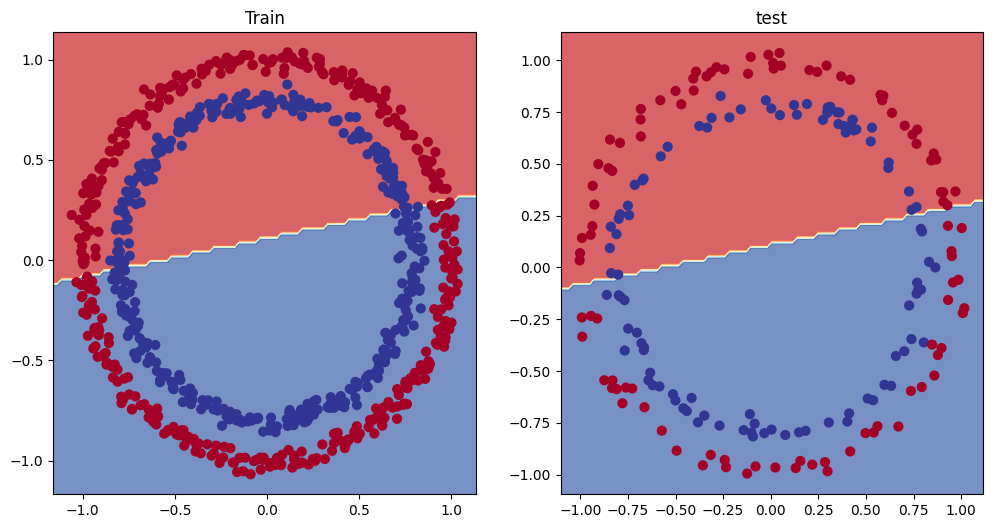

In [107]:
#from helper_functions import *
#Plot decision boundary of model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0,X_test,y_test)

## 5. Improving a model (from a model perspective)

* add more layers-give model more chances to learn about the patterns in the data
* Add more hidden units-go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

These options are all from a model's perspective because they deal directly with
the model, rather than the data.

Because these options are all values we can change, they are **hyperparameters**

Let's try and improve our model by:
* Adding more hidden units:5-->10
* Increase the number of layers:2 -->3
* Increase the number of epochs:100-->1000

In [108]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2, out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    # z=self.layer_1(x)
    # z=self.layer_2(z)
    # z=self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations leverages speed ups where possible behind the scenes

model_1=CircleModelV1().to(device)
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [109]:
# Create a loss function
loss_fn=nn.BCEWithLogitsLoss()

# Createan optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.1)

In [110]:
#write a training and evaluation loop for model_1
torch.manual_seed(42)

#set number of epochs
epochs=1000

#put data to target device
X_train, y_train=X_train.to(device), y_train.to(device)
X_test, y_test=X_test.to(device), y_test.to(device)

#Build training loop
for epoch in range(epochs):

  #Training
  model_1.train()

  #1.Forward pass
  y_logits=model_1(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))# turn logits->pred probs->pred labels

  #2. Calculate the loss (dependent on loss function/different from linear regression model built)

  loss=loss_fn(y_logits, ##nn.BCEWithMogitsLoss expects raw logits as input
               y_train)
  acc=accuracy_fn(y_true=y_train,
                  y_pred=y_pred)

  #3. Optimizer zer grad
  optimizer.zero_grad()

  #4.Loss backward
  loss.backward()

  #5. Optimizer step (gradient descent)
  optimizer.step()


 ##TESTING##
  model_1.eval()
  with torch.inference_mode():
  #1.forward pass
    test_logits=model_1(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

  #2. Calculate test loss/acc
    test_loss=loss_fn(test_logits,
                    y_test)
    test_acc=accuracy_fn(y_true=y_test,
                       y_pred=test_pred)

  #3. Print out what's happening
  if epoch%100==0:
    print(f"Epoch: {epoch} | Loss {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc:{test_acc:2f}%")




Epoch: 0 | Loss 0.69396, Acc: 50.88% | Test loss: 0.69261, Test acc:51.000000%
Epoch: 100 | Loss 0.69305, Acc: 50.38% | Test loss: 0.69379, Test acc:48.000000%
Epoch: 200 | Loss 0.69299, Acc: 51.12% | Test loss: 0.69437, Test acc:46.000000%
Epoch: 300 | Loss 0.69298, Acc: 51.62% | Test loss: 0.69458, Test acc:45.000000%
Epoch: 400 | Loss 0.69298, Acc: 51.12% | Test loss: 0.69465, Test acc:46.000000%
Epoch: 500 | Loss 0.69298, Acc: 51.00% | Test loss: 0.69467, Test acc:46.000000%
Epoch: 600 | Loss 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc:46.000000%
Epoch: 700 | Loss 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc:46.000000%
Epoch: 800 | Loss 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc:46.000000%
Epoch: 900 | Loss 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc:46.000000%


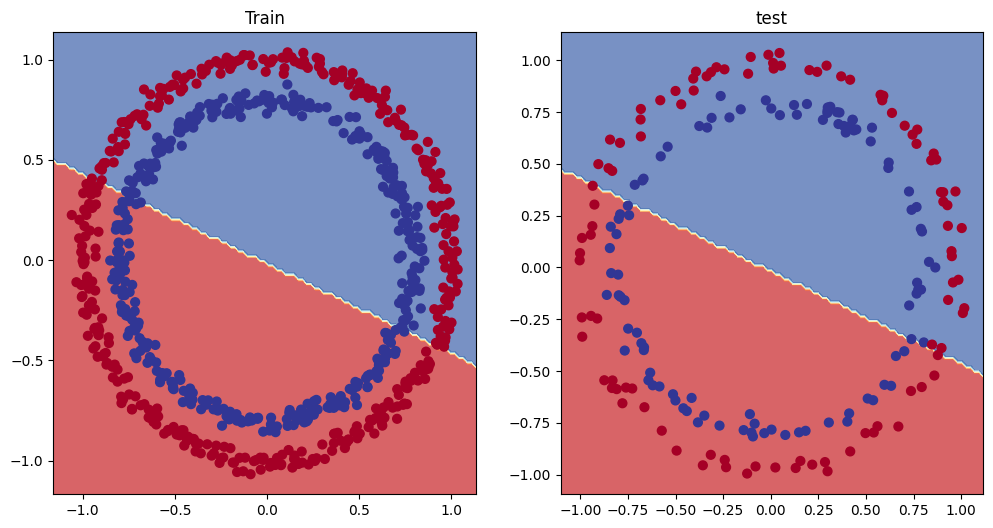

In [111]:
# Plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_1,X_test,y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot a larger problem to test a smaller problem

In [112]:
# Create some data (same as notebook 01)
weight=0.7
bias=0.3
start=0
end=1
step=0.01

#create data
X_regression=torch.arange(start,end,step).unsqueeze(dim=1)
y_regression=weight*X_regression+bias#LInear regression formula

#check data
X_regression[:5],y_regression[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [113]:
#create t & t split
train_split=int(0.8*len(X_regression))
X_train_regression,y_train_regression=X_regression[:train_split],y_regression[:train_split]
X_test_regression,y_test_regression=X_regression[train_split:],y_regression[train_split:]

#Check lengths
len(X_train_regression),len(X_test_regression),len(y_train_regression),len(y_test_regression)

(80, 20, 80, 20)

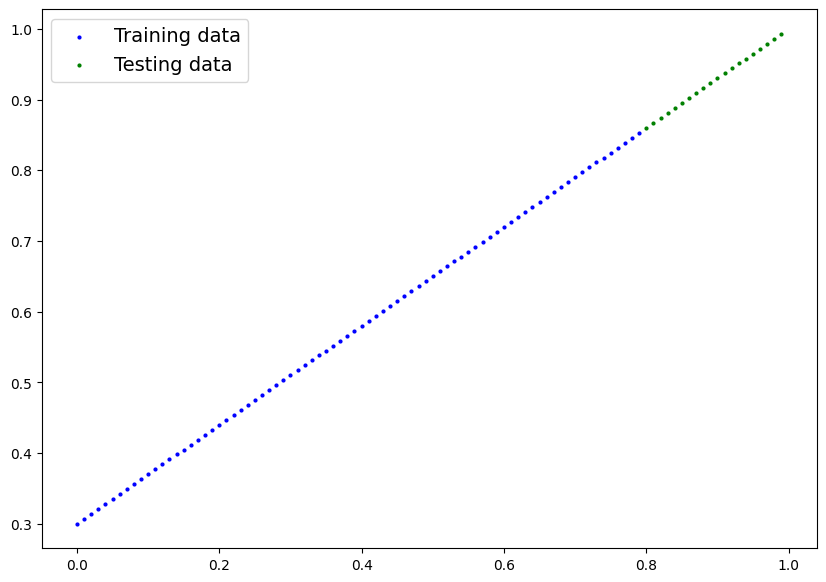

In [114]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

### 5.3 Adjusting `model_1` to fit a straight line

In [115]:
# Same architecture as model_1 (but using nn.Sequential())
model_2=nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [116]:
#loss & optimizer
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_2.parameters(),
                          lr=0.01)

In [117]:
#TRain the model
torch.manual_seed(42)
#torch.cuda.manual_seed(42)
#set epochs
epochs=1000

#put data on target device
X_train_regression,y_train_regression=X_train_regression.to(device),y_train_regression.to(device)
X_test_regression,y_test_regression=X_test_regression.to(device),y_test_regression.to(device)

#training loop
for epoch in range(epochs):

  model_2.train()

  y_pred=model_2(X_train_regression)
  loss=loss_fn(y_pred,y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred=model_2(X_test_regression)
    test_loss=loss_fn(test_pred,y_test_regression)

  #print out what happin
  if epoch%100==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss {test_loss:.5f}")



Epoch: 0 | Loss: 0.75986 | Test Loss 0.91103
Epoch: 100 | Loss: 0.02858 | Test Loss 0.00081
Epoch: 200 | Loss: 0.02533 | Test Loss 0.00209
Epoch: 300 | Loss: 0.02137 | Test Loss 0.00305
Epoch: 400 | Loss: 0.01964 | Test Loss 0.00341
Epoch: 500 | Loss: 0.01940 | Test Loss 0.00387
Epoch: 600 | Loss: 0.01903 | Test Loss 0.00379
Epoch: 700 | Loss: 0.01878 | Test Loss 0.00381
Epoch: 800 | Loss: 0.01840 | Test Loss 0.00329
Epoch: 900 | Loss: 0.01798 | Test Loss 0.00360


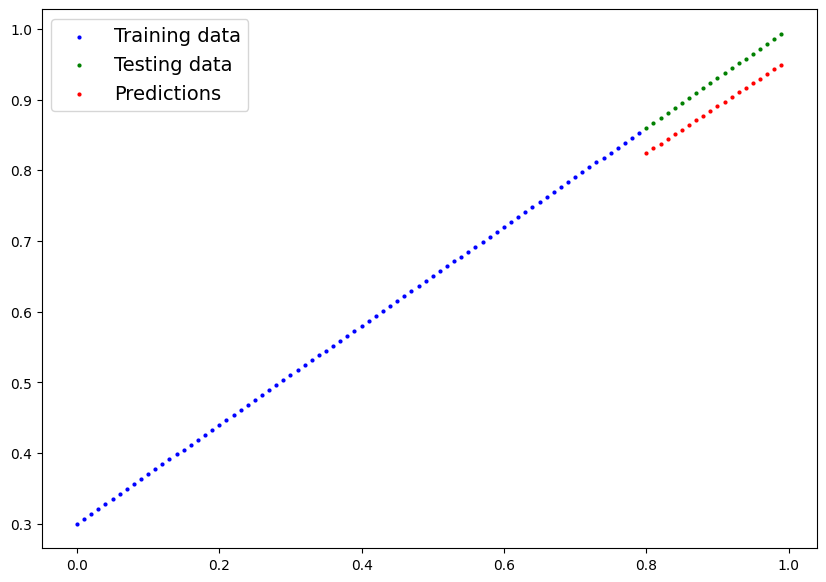

In [118]:
# turn on evaluation mode
model_2.eval()

#make predictions (inference)

with torch.inference_mode():
  y_preds=model_2(X_test_regression)

plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=y_preds)

## 6. The missing piece: non-linearity

"What patterns could be drawn if given an inifite amount of straight and non stright lines?"

Or in ML terms; an inifite (though it is finite) of linear and non-linear functions?

### 6.1 Recreating non-linear data (red and blue circles)

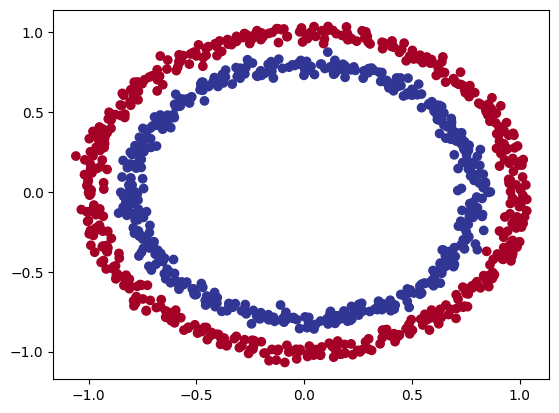

In [119]:
#'make a nd plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
n_samples=1000

X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [120]:
#convert data to tensors and then train and test splits
import torch
from sklearn.model_selection import train_test_split

#turn data to tensors
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

#Split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=42)

X[:3],y[:3]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733]]),
 tensor([1., 1., 1.]))

### 6.2 Building a model with non-linearity

* Linear = straight lines
* Non-Linear = non-straight lines

Artificial nneural networks are a large combination on linear and non-linear

In [121]:
# Build a model with non-linear activation functions
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU() #non linear activation function

  def forward(self,x):
    #where do we put non-linear activation functions?

    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_3=CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [122]:
# Create a loss function
loss_fn=nn.BCEWithLogitsLoss()

# Createan optimizer
optimizer=torch.optim.SGD(params=model_3.parameters(),
                          lr=0.1)

### 6.3 Training a model with non-Linearity

In [123]:
#write a training and evaluation loop for model_3
torch.manual_seed(42)
#torch.cuda.manual_seed(42)

#set number of epochs
epochs=1000

#put data to target device
X_train, y_train=X_train.to(device), y_train.to(device)
X_test, y_test=X_test.to(device), y_test.to(device)

#Build training loop
for epoch in range(epochs):

  #Training
  model_3.train()

  #1.Forward pass
  y_logits=model_3(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))# turn logits->pred probs->pred labels

  #2. Calculate the loss (dependent on loss function/different from linear regression model built)

  loss=loss_fn(y_logits, ##nn.BCEWithMogitsLoss expects raw logits as input
               y_train)
  acc=accuracy_fn(y_true=y_train,
                  y_pred=y_pred)

  #3. Optimizer zer0 grad
  optimizer.zero_grad()

  #4.Loss backward
  loss.backward()

  #5. Optimizer step (gradient descent)
  optimizer.step()


 ##TESTING##
  model_3.eval()
  with torch.inference_mode():
  #1.forward pass
    test_logits=model_3(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

  #2. Calculate test loss/acc
    test_loss=loss_fn(test_logits,
                    y_test)
    test_acc=accuracy_fn(y_true=y_test,
                       y_pred=test_pred)

  #3. Print out what's happenin'
  if epoch%100==0:
    print(f"Epoch: {epoch} | Loss {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc:{test_acc:2f}%")




Epoch: 0 | Loss 0.69295, Acc: 50.00% | Test loss: 0.69319, Test acc:50.000000%
Epoch: 100 | Loss 0.69115, Acc: 52.88% | Test loss: 0.69102, Test acc:52.500000%
Epoch: 200 | Loss 0.68977, Acc: 53.37% | Test loss: 0.68940, Test acc:55.000000%
Epoch: 300 | Loss 0.68795, Acc: 53.00% | Test loss: 0.68723, Test acc:56.000000%
Epoch: 400 | Loss 0.68517, Acc: 52.75% | Test loss: 0.68411, Test acc:56.500000%
Epoch: 500 | Loss 0.68102, Acc: 52.75% | Test loss: 0.67941, Test acc:56.500000%
Epoch: 600 | Loss 0.67515, Acc: 54.50% | Test loss: 0.67285, Test acc:56.000000%
Epoch: 700 | Loss 0.66659, Acc: 58.38% | Test loss: 0.66322, Test acc:59.000000%
Epoch: 800 | Loss 0.65160, Acc: 64.00% | Test loss: 0.64757, Test acc:67.500000%
Epoch: 900 | Loss 0.62362, Acc: 74.00% | Test loss: 0.62145, Test acc:79.000000%


### 6.4 Evaluating a model trained with non-linear activation functions

In [124]:
#make predictions
model_3.eval()
with torch.inference_mode():
  y_preds=torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

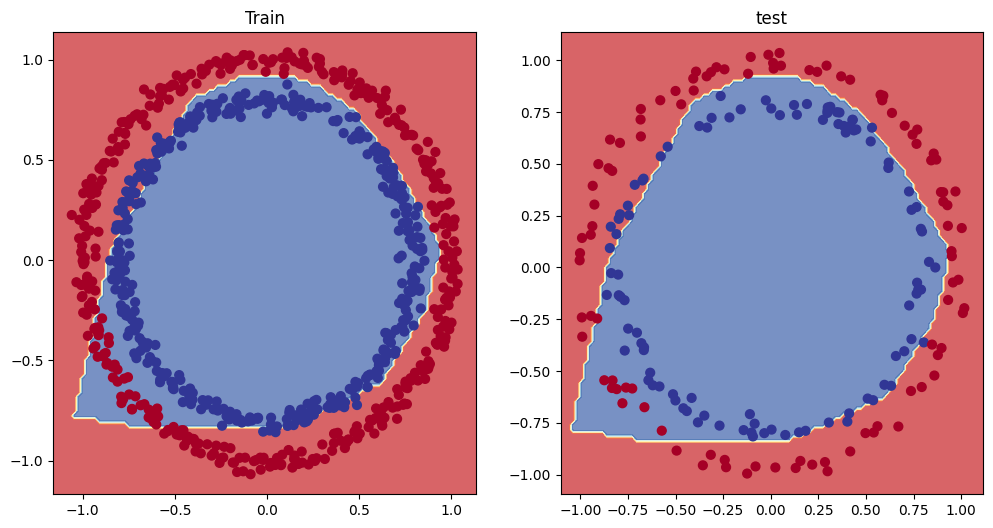

In [125]:
#plot decisions
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_3,X_test,y_test)

## 7. replicating non-linear activation functions

Nueral networks, rather than us telling model what to learn, we give it tools to discover patterns in the data and it tries to figure out patterns on it's own

These tools are linear and non-linear functions

In [126]:
# Create a tensor
A=torch.arange(-10,10,1,dtype=torch.float32)
A.dtype

torch.float32

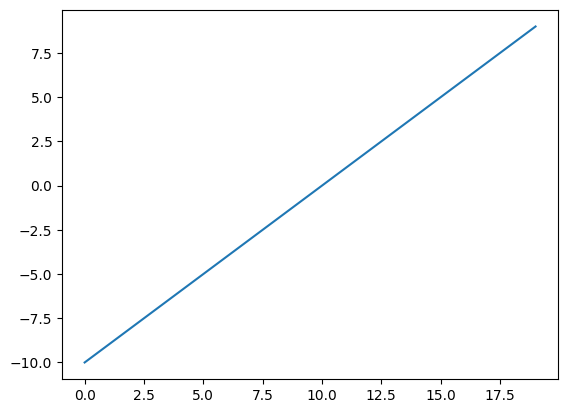

In [127]:
# Visualize
plt.plot(A)

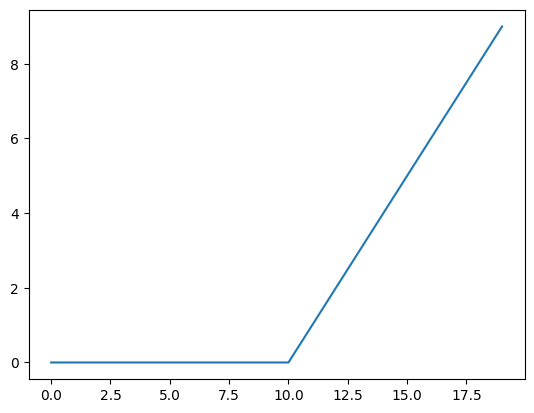

In [128]:
plt.plot(torch.relu(A))

In [129]:
def relu(x: torch.Tensor)->torch.Tensor:
  return torch.maximum(torch.tensor(0),x) #inputs must be tensors

relu(A),A

(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
         8., 9.]),
 tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
           2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.]))

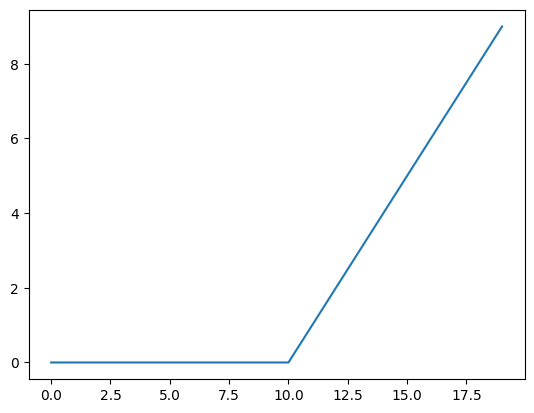

In [130]:
plt.plot(relu(A))

In [131]:
#Now let's do the same from sigmoid https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html#torch.nn.Sigmoid

def sigmoid(x):
  return 1/(1+torch.exp(-x))

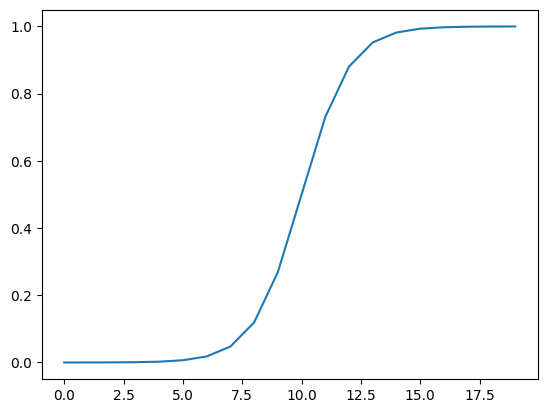

In [132]:
plt.plot(torch.sigmoid(A))

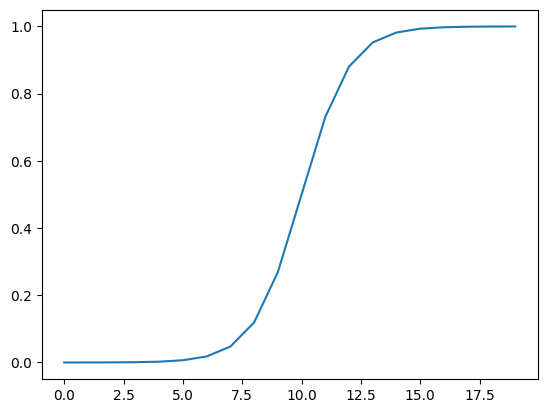

In [133]:
plt.plot(sigmoid(A))

## 8. Putting it all togeether with a multi-class classification problem

* Binary classification - one thing or another (0 or 1)
* Multi-class classifcation = more than one thing or another (cat, dog or catdog)

### 8.1 Creating a toy multi-class dataset

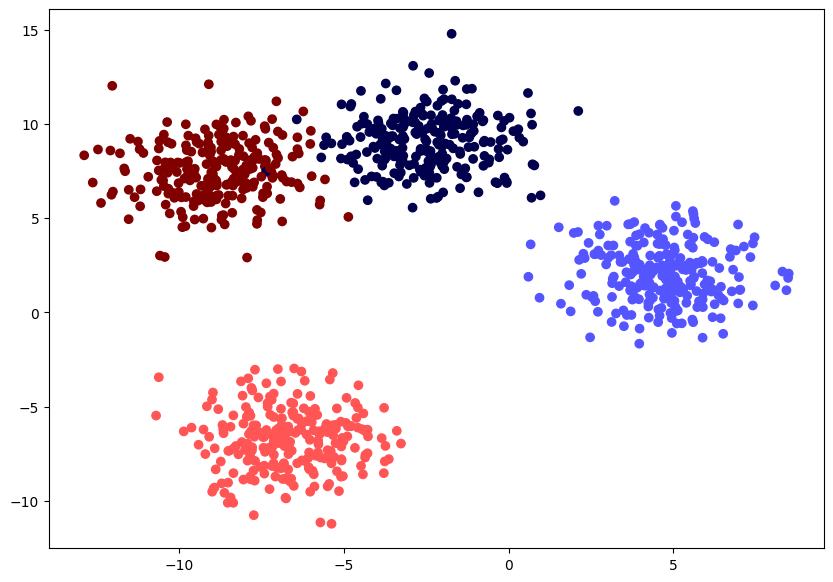

In [134]:
#import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#set hyperparameters for data creation
NUM_CLASSES =4
NUM_FEATURES=2
RANDOM_SEED=42

#1. Create multi-class data
x_blob, y_blob=make_blobs(n_samples=1000,
                          n_features=NUM_FEATURES,
                          centers=NUM_CLASSES,
                          cluster_std=1.5,#give clusters little shake
                          random_state=RANDOM_SEED)

#2. Turn data into tensors
x_blob=torch.from_numpy(x_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor)

#3. split into train and test
X_blob_train, X_blob_test,y_blob_train,y_blob_test=train_test_split(x_blob,
                                                                    y_blob,
                                                                    test_size=0.2,
                                                                    random_state=RANDOM_SEED)

#4. PLot Data(visualize)

plt.figure(figsize=(10,7))
plt.scatter(x_blob[:,0],x_blob[:,1],c=y_blob,cmap=plt.cm.seismic)



### 8.2 Building a multi-class classification in PyTorch

In [135]:
# Create device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [136]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features,output_features,hidden_units=8):
    """Initializes multi-class classification mode.

    ARGs:
      input_features (int): Number of input features to the model
      output_features (int): Number of output features (number of output classes)
      hidden_units (int): Number of hidden inits between layers

    """
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)

#Create an instance of Blobl MOdel and send it to target device

model_4=BlobModel(input_features=2,
                  output_features=4,
                  hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [137]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

### 8.3 Create a loss function and optimizer for multi-class classification

In [138]:
##Create a loss function for multi-class classification
loss_fn=nn.CrossEntropyLoss()

#Create an optimzer for multi-class classification
optimizer=torch.optim.SGD(params=model_4.parameters(),
                          lr=0.1) # learning rate is hyperparameter)

### 8.4 Getting predicition probabiliites for a multi-class PyTorch model

In order to evaluate and train and test our model we need to convert our model's outputs (logits) to predictions labels.

Logits (raw outputs of the model)->Pred prob (use `torch.softmax`)->Pred labels (take the `torch.argmax` of the prediction probabilities

In [139]:
#lets get some raw output of our model
model_4.eval()
with torch.inference_mode():
  y_logits=model_4(X_blob_test).to(device)

y_logits[:5], y_blob_test[:5]

(tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
         [-0.0973, -0.9431, -0.5963, -0.1371],
         [ 0.2528, -0.2379,  0.1882, -0.0066],
         [-0.4134, -0.5204, -0.9303, -0.6963],
         [-0.3118, -1.3736, -1.1991, -0.3834]]),
 tensor([1, 3, 2, 1, 0]))

In [140]:
#Conver logit out puts to rpediction probabilities
y_pred_probs=torch.softmax(y_logits, dim=1) #softmax for multi-class as oppose to sigmoid from binary classification
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [141]:
torch.sum(y_pred_probs[0]),y_pred_probs[0],torch.max(y_pred_probs[0]), torch.argmax(y_pred_probs[0])

(tensor(1.0000),
 tensor([0.3169, 0.3244, 0.1405, 0.2182]),
 tensor(0.3244),
 tensor(1))

In [142]:
#Convert model's prediction probabilities to prediction labels
y_preds=torch.argmax(y_pred_probs, dim=1)

y_pred[:10], y_blob_test[:10]

(tensor([1., 0., 0., 0., 1., 1., 1., 1., 0., 0.], grad_fn=<SliceBackward0>),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]))

### 8.5 Creating a training and testing loop for a multi-class PyTorch model

In [143]:
#write a training and evaluation loop for model_4
#always set the manual seed first
torch.manual_seed(42)

#next set number of epochs (hyperparameter)
epochs=1000

#put data to target device
X_blob_train,y_blob_train=X_blob_train.to(device),y_blob_train.to(device)
X_blob_test,y_blob_test=X_blob_test.to(device),y_blob_test.to(device)

#Build training loop
# ♪♪♪for an epoch in a range ♪♪♪
for epoch in range(epochs):

  #set model to train-TRAINING
  model_4.train()
  #1.♪♪♪ do the Forward pass♪♪♪♪
  y_logits=model_4(X_blob_train)
  y_pred=torch.argmax(torch.softmax(y_logits, dim=1),dim=1)# turn logits->pred probs->pred labels

  #2.♪♪♪♪♪ Calculate the loss ♪♪♪

  loss=loss_fn(y_logits, ##nn.CrossEntropyLoss
               y_blob_train)
  acc=accuracy_fn(y_true=y_blob_train,
                  y_pred=y_pred)

  #3. ♪♪♪Optimizer the zero grad ♪♪
  optimizer.zero_grad()

  #4.♪♪♪♪Loss backward♪♪♪♪
  loss.backward()

  #5. ♪♪♪♪♪Optimizer step,step,step♪♪♪ (gradient descent)
  optimizer.step()


 ##TESTING##
  model_4.eval()
  with torch.inference_mode():
  #1.forward pass
    test_logits=model_4(X_blob_test)
    test_pred=torch.softmax(test_logits,dim=1).argmax(dim=1)

  #2. Calculate test loss/acc
    test_loss=loss_fn(test_logits,
                    y_blob_test)
    test_acc=accuracy_fn(y_true=y_blob_test,
                       y_pred=test_pred)

  #3. ♪♪♪Print out what's happenin' ♪♪♪♪
  if epoch%100==0:
    print(f"Epoch: {epoch} | Loss {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc:{test_acc:2f}%")




Epoch: 0 | Loss 1.15883, Acc: 40.38% | Test loss: 1.07554, Test acc:48.000000%
Epoch: 100 | Loss 0.03312, Acc: 99.25% | Test loss: 0.02433, Test acc:99.500000%
Epoch: 200 | Loss 0.02657, Acc: 99.25% | Test loss: 0.01651, Test acc:99.500000%
Epoch: 300 | Loss 0.02503, Acc: 99.25% | Test loss: 0.01440, Test acc:99.500000%
Epoch: 400 | Loss 0.02427, Acc: 99.25% | Test loss: 0.01335, Test acc:99.500000%
Epoch: 500 | Loss 0.02377, Acc: 99.25% | Test loss: 0.01269, Test acc:99.500000%
Epoch: 600 | Loss 0.02339, Acc: 99.25% | Test loss: 0.01218, Test acc:99.500000%
Epoch: 700 | Loss 0.02307, Acc: 99.25% | Test loss: 0.01179, Test acc:99.500000%
Epoch: 800 | Loss 0.02279, Acc: 99.25% | Test loss: 0.01147, Test acc:99.500000%
Epoch: 900 | Loss 0.02253, Acc: 99.25% | Test loss: 0.01120, Test acc:99.500000%


In [144]:
y_blob_train.shape,y_blob_train.dtype,y_logits.shape,y_logits.dtype

(torch.Size([800]), torch.int64, torch.Size([800, 4]), torch.float32)

### 8.6 Making and evaluating predictions with a PyTorch multi-class model

In [146]:
model_4.eval()
with torch.inference_mode():
  y_logits=model_4(X_blob_test)

y_logits[:10]

tensor([[ -2.3751,  10.9387, -10.2038, -11.3271],
        [ -2.1934,  -9.4839,  -6.3062,   5.2289],
        [ -4.9855,  -5.3790,   5.3840,  -4.3115],
        [ -3.0428,   8.1532,  -5.4971,  -6.6867],
        [  6.4903,  -2.8975, -12.3324,  -8.4675],
        [ -2.7723, -11.1927,  -7.4741,   6.3901],
        [ -4.3608,  -4.5814,   4.6891,  -3.5910],
        [  5.8017,  -6.8308,  -9.7351,  -4.1265],
        [ -6.3789,  -6.9228,   6.6639,  -5.5251],
        [  6.2822,  -5.5357, -10.3558,  -5.4748]])

In [147]:
y_pred_probs=torch.softmax(y_logits,dim=1)
y_pred_probs[:10]

tensor([[1.6515e-06, 1.0000e+00, 6.5754e-10, 2.1385e-10],
        [5.9742e-04, 4.0741e-07, 9.7747e-06, 9.9939e-01],
        [3.1371e-05, 2.1165e-05, 9.9989e-01, 6.1552e-05],
        [1.3729e-05, 9.9998e-01, 1.1796e-06, 3.5901e-07],
        [9.9992e-01, 8.3726e-05, 6.6887e-09, 3.1906e-07],
        [1.0490e-04, 2.3112e-08, 9.5245e-07, 9.9989e-01],
        [1.1735e-04, 9.4120e-05, 9.9954e-01, 2.5340e-04],
        [9.9995e-01, 3.2638e-06, 1.7882e-07, 4.8777e-05],
        [2.1657e-06, 1.2571e-06, 9.9999e-01, 5.0863e-06],
        [9.9998e-01, 7.3709e-06, 5.9454e-08, 7.8339e-06]])

In [149]:
#Go from pred probs ot pred labels
y_preds=torch.argmax(y_pred_probs,dim=1)
y_preds[:10]==y_blob_test[:10]

tensor([True, True, True, True, True, True, True, True, True, True])

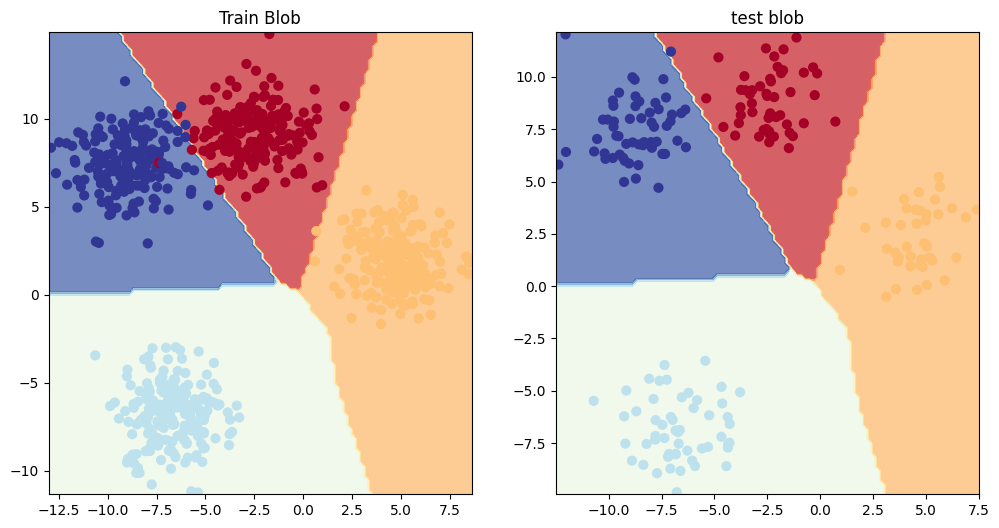

In [145]:
##plot decisions #this data is linearly sepreable so non-linear functions not required here
#will be a case by case basis on whether non-linear functions are necessary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train Blob")
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("test blob")
plot_decision_boundary(model_4,X_blob_test,y_blob_test)

## 9. A few more classification metrics (to evaluate our classification model)

* Accuracy - out of 100 samples how many does the model get right
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report

See this for precision/recall : https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c?gi=01d7d78f6c2e

If you want access to a lot of PyTorch metrics see: https://torchmetrics.readthedocs.io/en/latest/

In [152]:
!pip install torchmetrics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 6.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [159]:
from torchmetrics import Accuracy

#set up metric
torchmetric_accuracy=Accuracy(task='multiclass',num_classes=4).to(device)

#calculate accuracy
torchmetric_accuracy(y_preds,y_blob_test)

tensor(0.9950)

In [158]:
Accuracy(task='multiclass',num_classes=4)

MulticlassAccuracy()

## Exercises & Extra

See exercises: https://www.learnpytorch.io/02_pytorch_classification/#exercises

In [234]:
import sklearn
from sklearn.datasets import make_moons

#make 100 samples
n_samp=1000

#create circles

X,y=make_moons(n_samp,
                 noise=0.03,
                 random_state=42)
len(X),len(y)

(1000, 1000)

In [235]:
print(f"First f samples of X: {X[:5]}")
print(f"First f samples of y: {y[:5]}")

First f samples of X: [[-0.00933187  0.39098105]
 [ 0.95457387 -0.47375583]
 [ 0.9185256  -0.42519648]
 [ 0.41276802 -0.37638459]
 [-0.84532016  0.52879908]]
First f samples of y: [1 1 1 1 0]


In [236]:
#make a DataFrame of moons
import pandas as pd

moons=pd.DataFrame({"X1":X[:,0],
                      "X2":X[:,1],
                      "label":y})

moons.head(5)

,X1,X2,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0


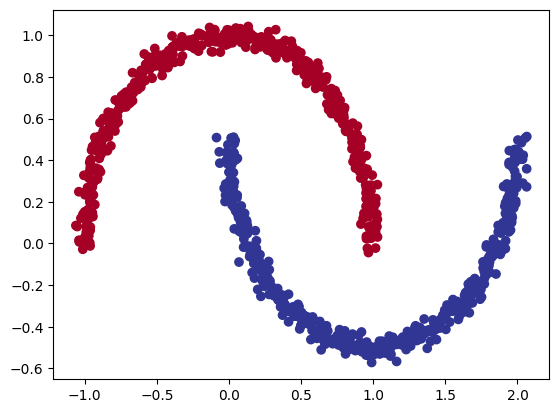

In [237]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [238]:
#Split into training and test sets
from sklearn.model_selection import train_test_split

#conver from numpy to tensor
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,#20% of data is test
                                                  random_state=42)

len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [239]:
class MoonModelV1(nn.Module):
    def __init__(self, in_features, out_features, hidden_units):
        super().__init__()

        self.layer1 = nn.Linear(in_features=in_features,
                                 out_features=hidden_units)
        self.layer2 = nn.Linear(in_features=hidden_units,
                                 out_features=hidden_units)
        self.layer3 = nn.Linear(in_features=hidden_units,
                                out_features=out_features)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model_moon = MoonModelV1(in_features=2,
                      out_features=1,
                      hidden_units=10).to(device)
model_moon

MoonModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [240]:
# Create a loss function
loss_fn=nn.BCEWithLogitsLoss()

# Createan optimizer
optimizer=torch.optim.SGD(params=model_moon.parameters(),
                          lr=0.1)

In [241]:
#write a training and evaluation loop for model_moon
torch.manual_seed(42)
#torch.cuda.manual_seed(42)

#set number of epochs
epochs=1000

#put data to target device
X_train, y_train=X_train.to(device), y_train.to(device)
X_test, y_test=X_test.to(device), y_test.to(device)

#tracking different values
epoch_count=[]
loss_value=[]
test_loss_value=[]

#Build training loop
for epoch in range(epochs):

  #Training
  model_moon.train()

  #1.Forward pass
  y_logits=model_moon(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))# turn logits->pred probs->pred labels

  #2. Calculate the loss (dependent on loss function/different from linear regression model built)

  loss=loss_fn(y_logits, ##nn.BCEWithMogitsLoss expects raw logits as input
               y_train)
  acc=accuracy_fn(y_true=y_train,
                  y_pred=y_pred)

  #3. Optimizer zer0 grad
  optimizer.zero_grad()

  #4.Loss backward
  loss.backward()

  #5. Optimizer step (gradient descent)
  optimizer.step()


 ##TESTING##
  model_moon.eval()
  with torch.inference_mode():
  #1.forward pass
    test_logits=model_moon(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

  #2. Calculate test loss/acc
    test_loss=loss_fn(test_logits,
                    y_test)
    test_acc=accuracy_fn(y_true=y_test,
                       y_pred=test_pred)

  #3. Print out what's happenin'
  if epoch%100==0:
    epoch_count.append(epoch)
    loss_value.append(loss)
    test_loss_value.append(test_loss)
    print(f"Epoch: {epoch} | Loss {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc:{test_acc:2f}%")




Epoch: 0 | Loss 0.69537, Acc: 37.75% | Test loss: 0.69457, Test acc:49.500000%
Epoch: 100 | Loss 0.38636, Acc: 81.88% | Test loss: 0.40196, Test acc:77.000000%
Epoch: 200 | Loss 0.23664, Acc: 88.62% | Test loss: 0.23758, Test acc:90.000000%
Epoch: 300 | Loss 0.19082, Acc: 91.38% | Test loss: 0.18528, Test acc:92.500000%
Epoch: 400 | Loss 0.15147, Acc: 93.75% | Test loss: 0.14452, Test acc:94.000000%
Epoch: 500 | Loss 0.10692, Acc: 95.62% | Test loss: 0.09974, Test acc:97.500000%
Epoch: 600 | Loss 0.06902, Acc: 98.50% | Test loss: 0.06298, Test acc:99.000000%
Epoch: 700 | Loss 0.04417, Acc: 99.75% | Test loss: 0.03936, Test acc:99.500000%
Epoch: 800 | Loss 0.03007, Acc: 100.00% | Test loss: 0.02625, Test acc:100.000000%
Epoch: 900 | Loss 0.02188, Acc: 100.00% | Test loss: 0.01887, Test acc:100.000000%


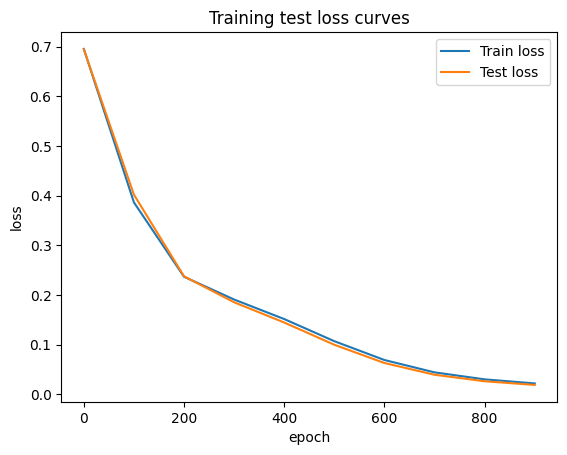

In [242]:
#plot loss curves
import numpy as np
#convert tensor to numpy
#.cpu() for when on gpu()
lsvl=np.array(torch.tensor(loss_value).numpy())
Tlsvl=np.array(torch.tensor(test_loss_value).numpy())
plt.plot(epoch_count, lsvl, label="Train loss")
plt.plot(epoch_count, test_loss_value, label="Test loss")
plt.title("Training test loss curves")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()

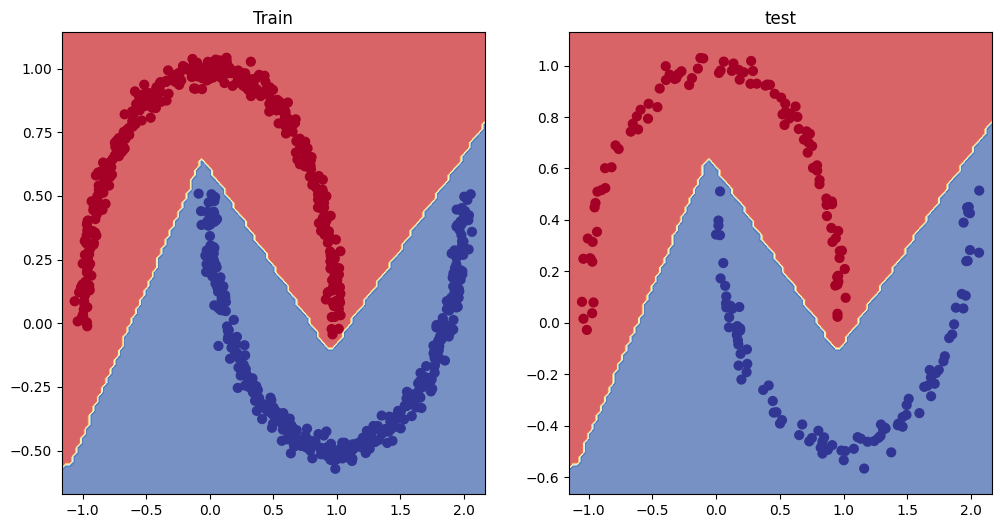

In [243]:
#plot decisions
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_moon,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_moon,X_test,y_test)